# The generation of the stationary and non-stationary time series

# Trends and decomposition

In [128]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats
from datetime import datetime
from matplotlib import pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa import stattools


Exercise №1

Choose about 3-6 variables from your dataset (2-3 – target variables, the rest - predictors).

In [127]:
# Load dataset
path_to_file = '../Datasets/timeStamped_Challenger_Ranked_Games.csv'
source_df = pd.read_csv(path_to_file, engine='python')
source_df.head(10)

# Aggregation

# Proccess Timestamps
source_df['timeStamp']=pd.to_datetime(source_df['timeStamp'], format='%Y-%m-%d %H:%M:%S')
source_df['timeStamp']=source_df['timeStamp'].dt.round('3h') 

# Choose varioables
# target:
target_cols = ["blueTotalHeal", "blueTotalGold"]
# predictors:
pred_cols = ["gameDuraton", "blueChampionDamageDealt"]

col_names = target_cols + pred_cols

df_agged=source_df.groupby('timeStamp', as_index=False).agg({"blueTotalHeal": "mean", "blueTotalGold": "mean", "gameDuraton": "mean", "blueChampionDamageDealt": "mean"})
df_agged=df_agged.sort_values('timeStamp')
df_agged.head(10)

,timeStamp,blueTotalHeal,blueTotalGold,gameDuraton,blueChampionDamageDealt
0,2019-01-03 18:00:00,18.092000,43.865000,23.900000,57.547000
1,2019-01-05 18:00:00,35.028667,51.676000,26.477778,72.211333
2,2019-01-07 18:00:00,20.913333,46.317333,22.594444,51.522333
3,2019-01-08 15:00:00,21.567000,60.554000,26.416667,94.014000
4,2019-01-08 18:00:00,45.280000,78.178000,37.250000,114.909000
5,2019-01-11 18:00:00,24.877500,48.762000,24.225000,60.525500
6,2019-01-12 18:00:00,31.983000,70.050000,31.500000,110.272000
7,2019-01-13 15:00:00,5.726000,40.619000,23.233333,54.175000
8,2019-01-14 12:00:00,16.576000,33.484000,15.333333,26.938000
9,2019-01-14 15:00:00,29.339000,52.979000,27.550000,80.685000


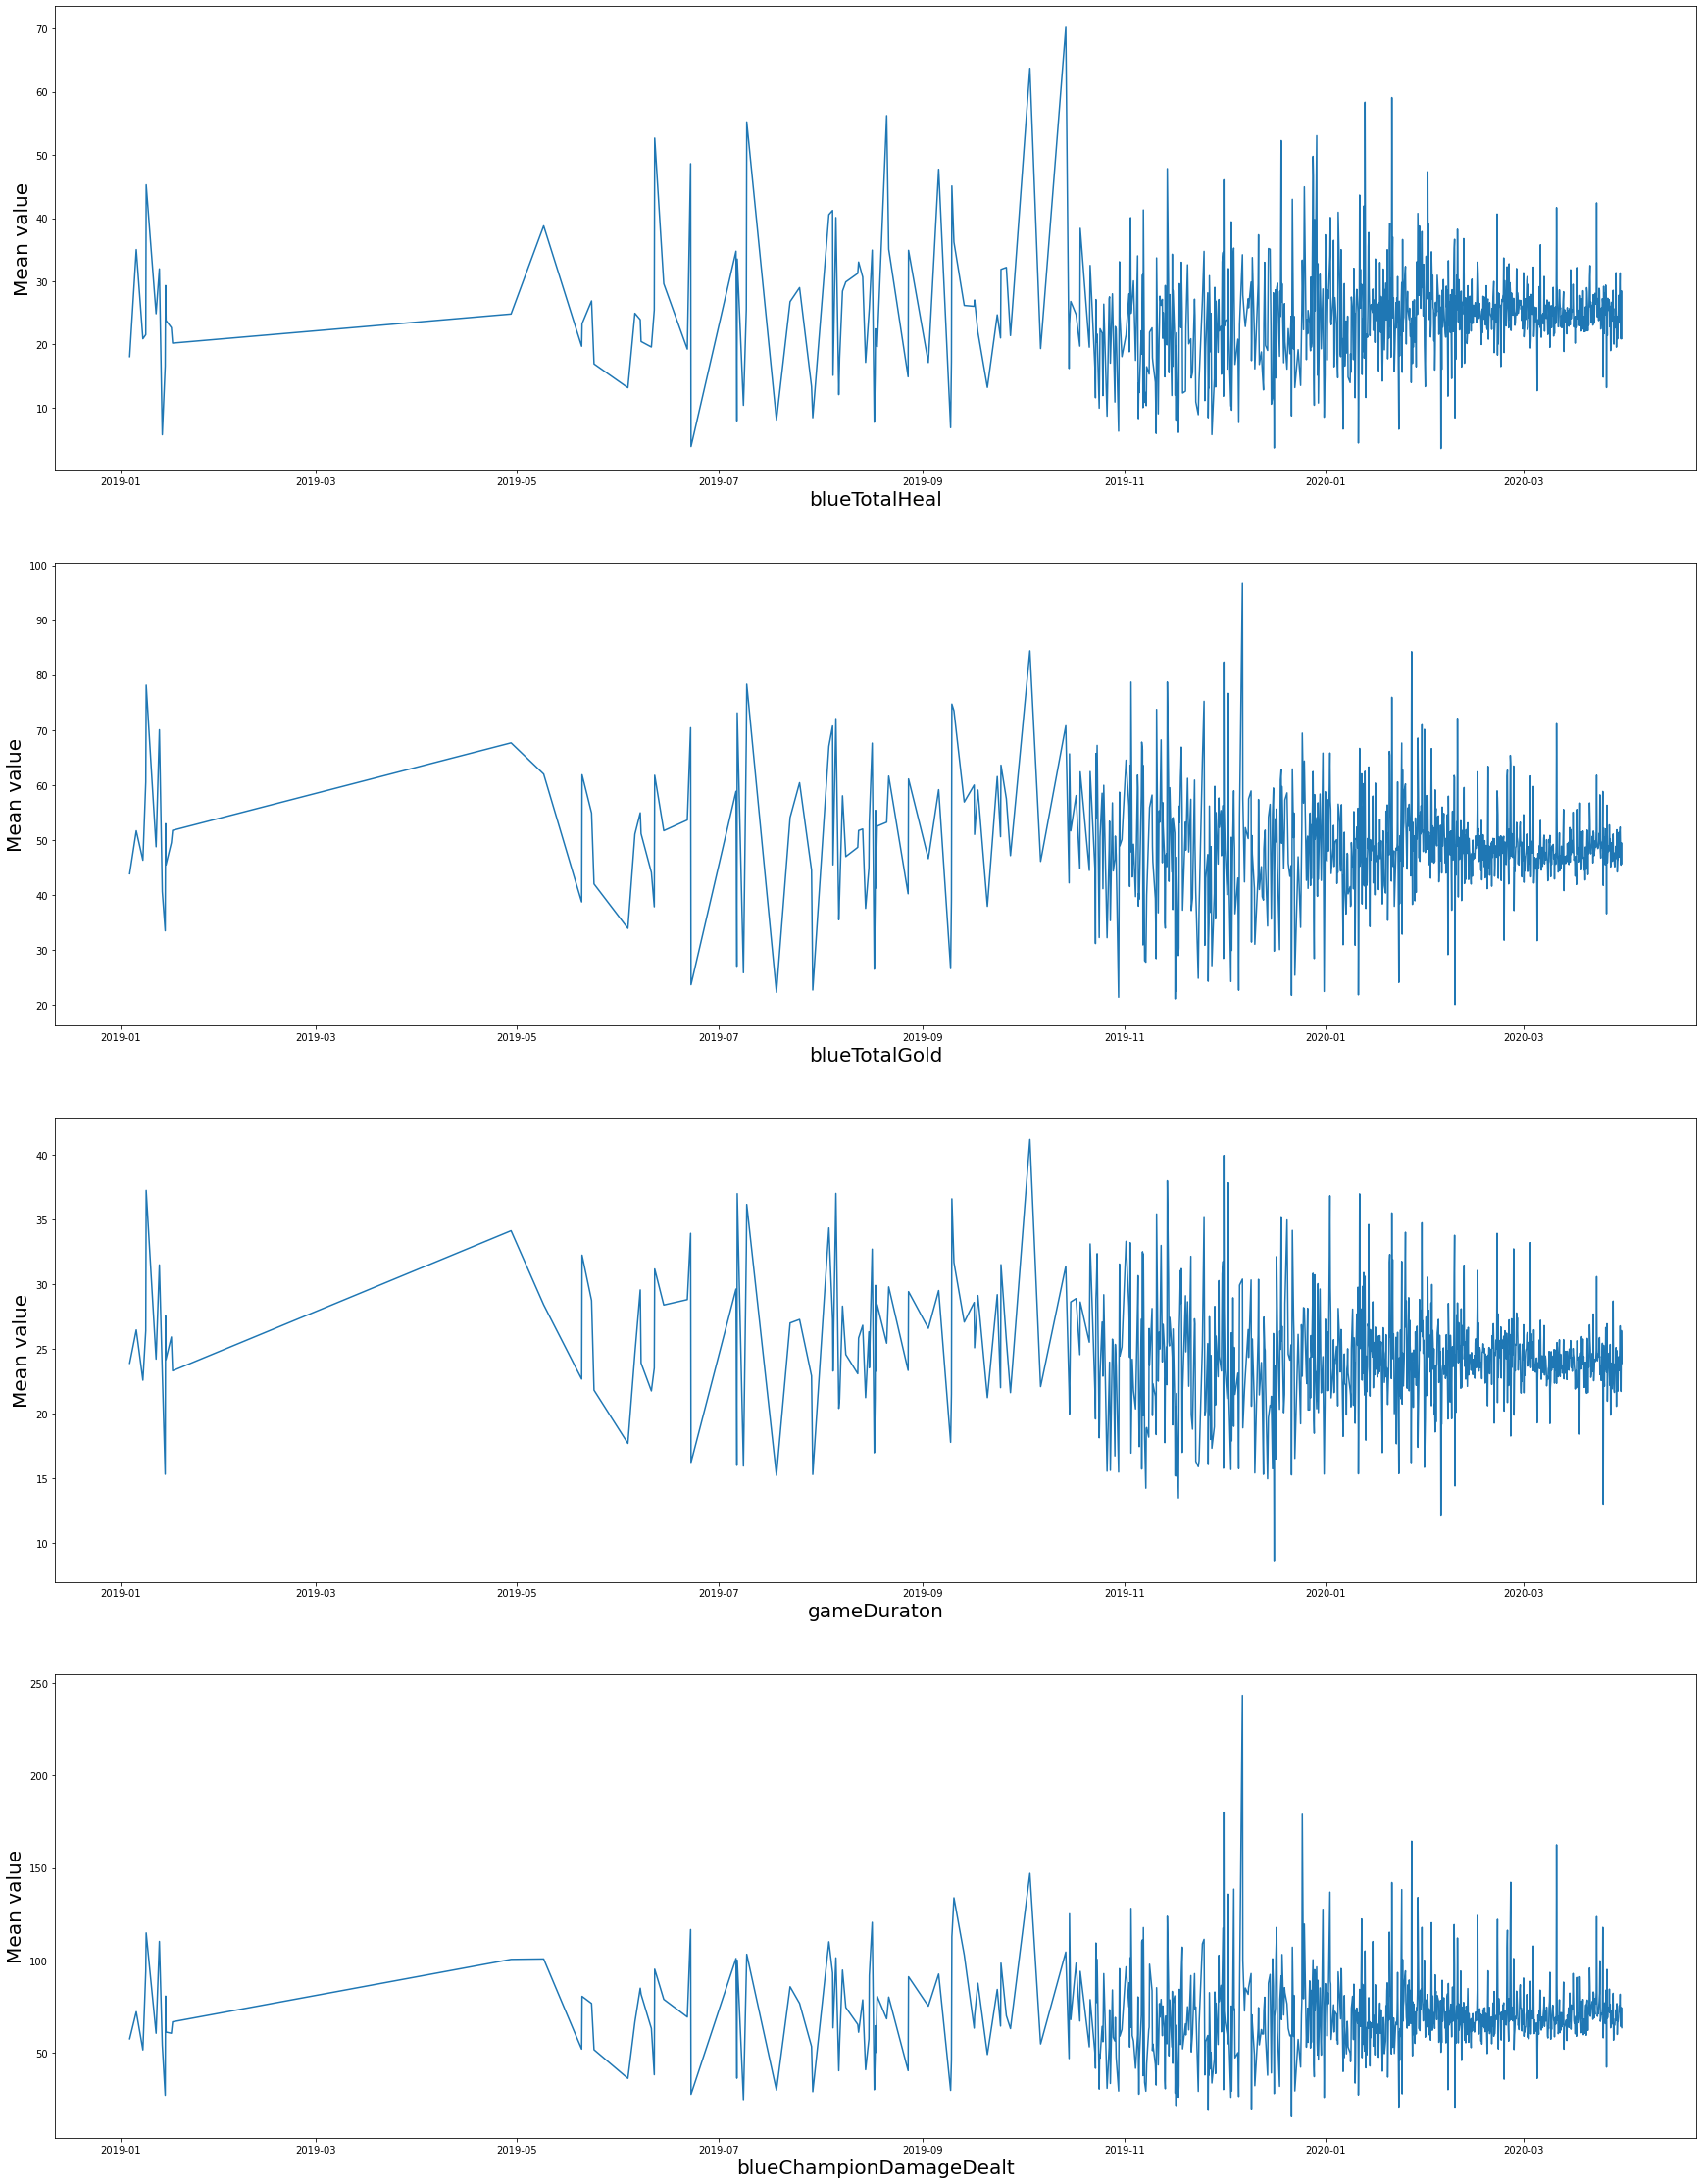

In [97]:

# Show processes for all data
fig, axes = plt.subplots(len(col_names), figsize=(30, 10 * len(col_names)))

idx = 0
for col_name in col_names:
    axes[idx].plot(df_agged['timeStamp'],df_agged[col_name])

    axes[idx].set_xlabel(col_name, fontsize = 20)
    axes[idx].set_ylabel(u'Mean value', fontsize = 20)

    idx += 1


Exercise №2

Analyze stationarity of a process (for mathematical expectation and variance) for all chosen variables. Make them more stationary if needed.

696


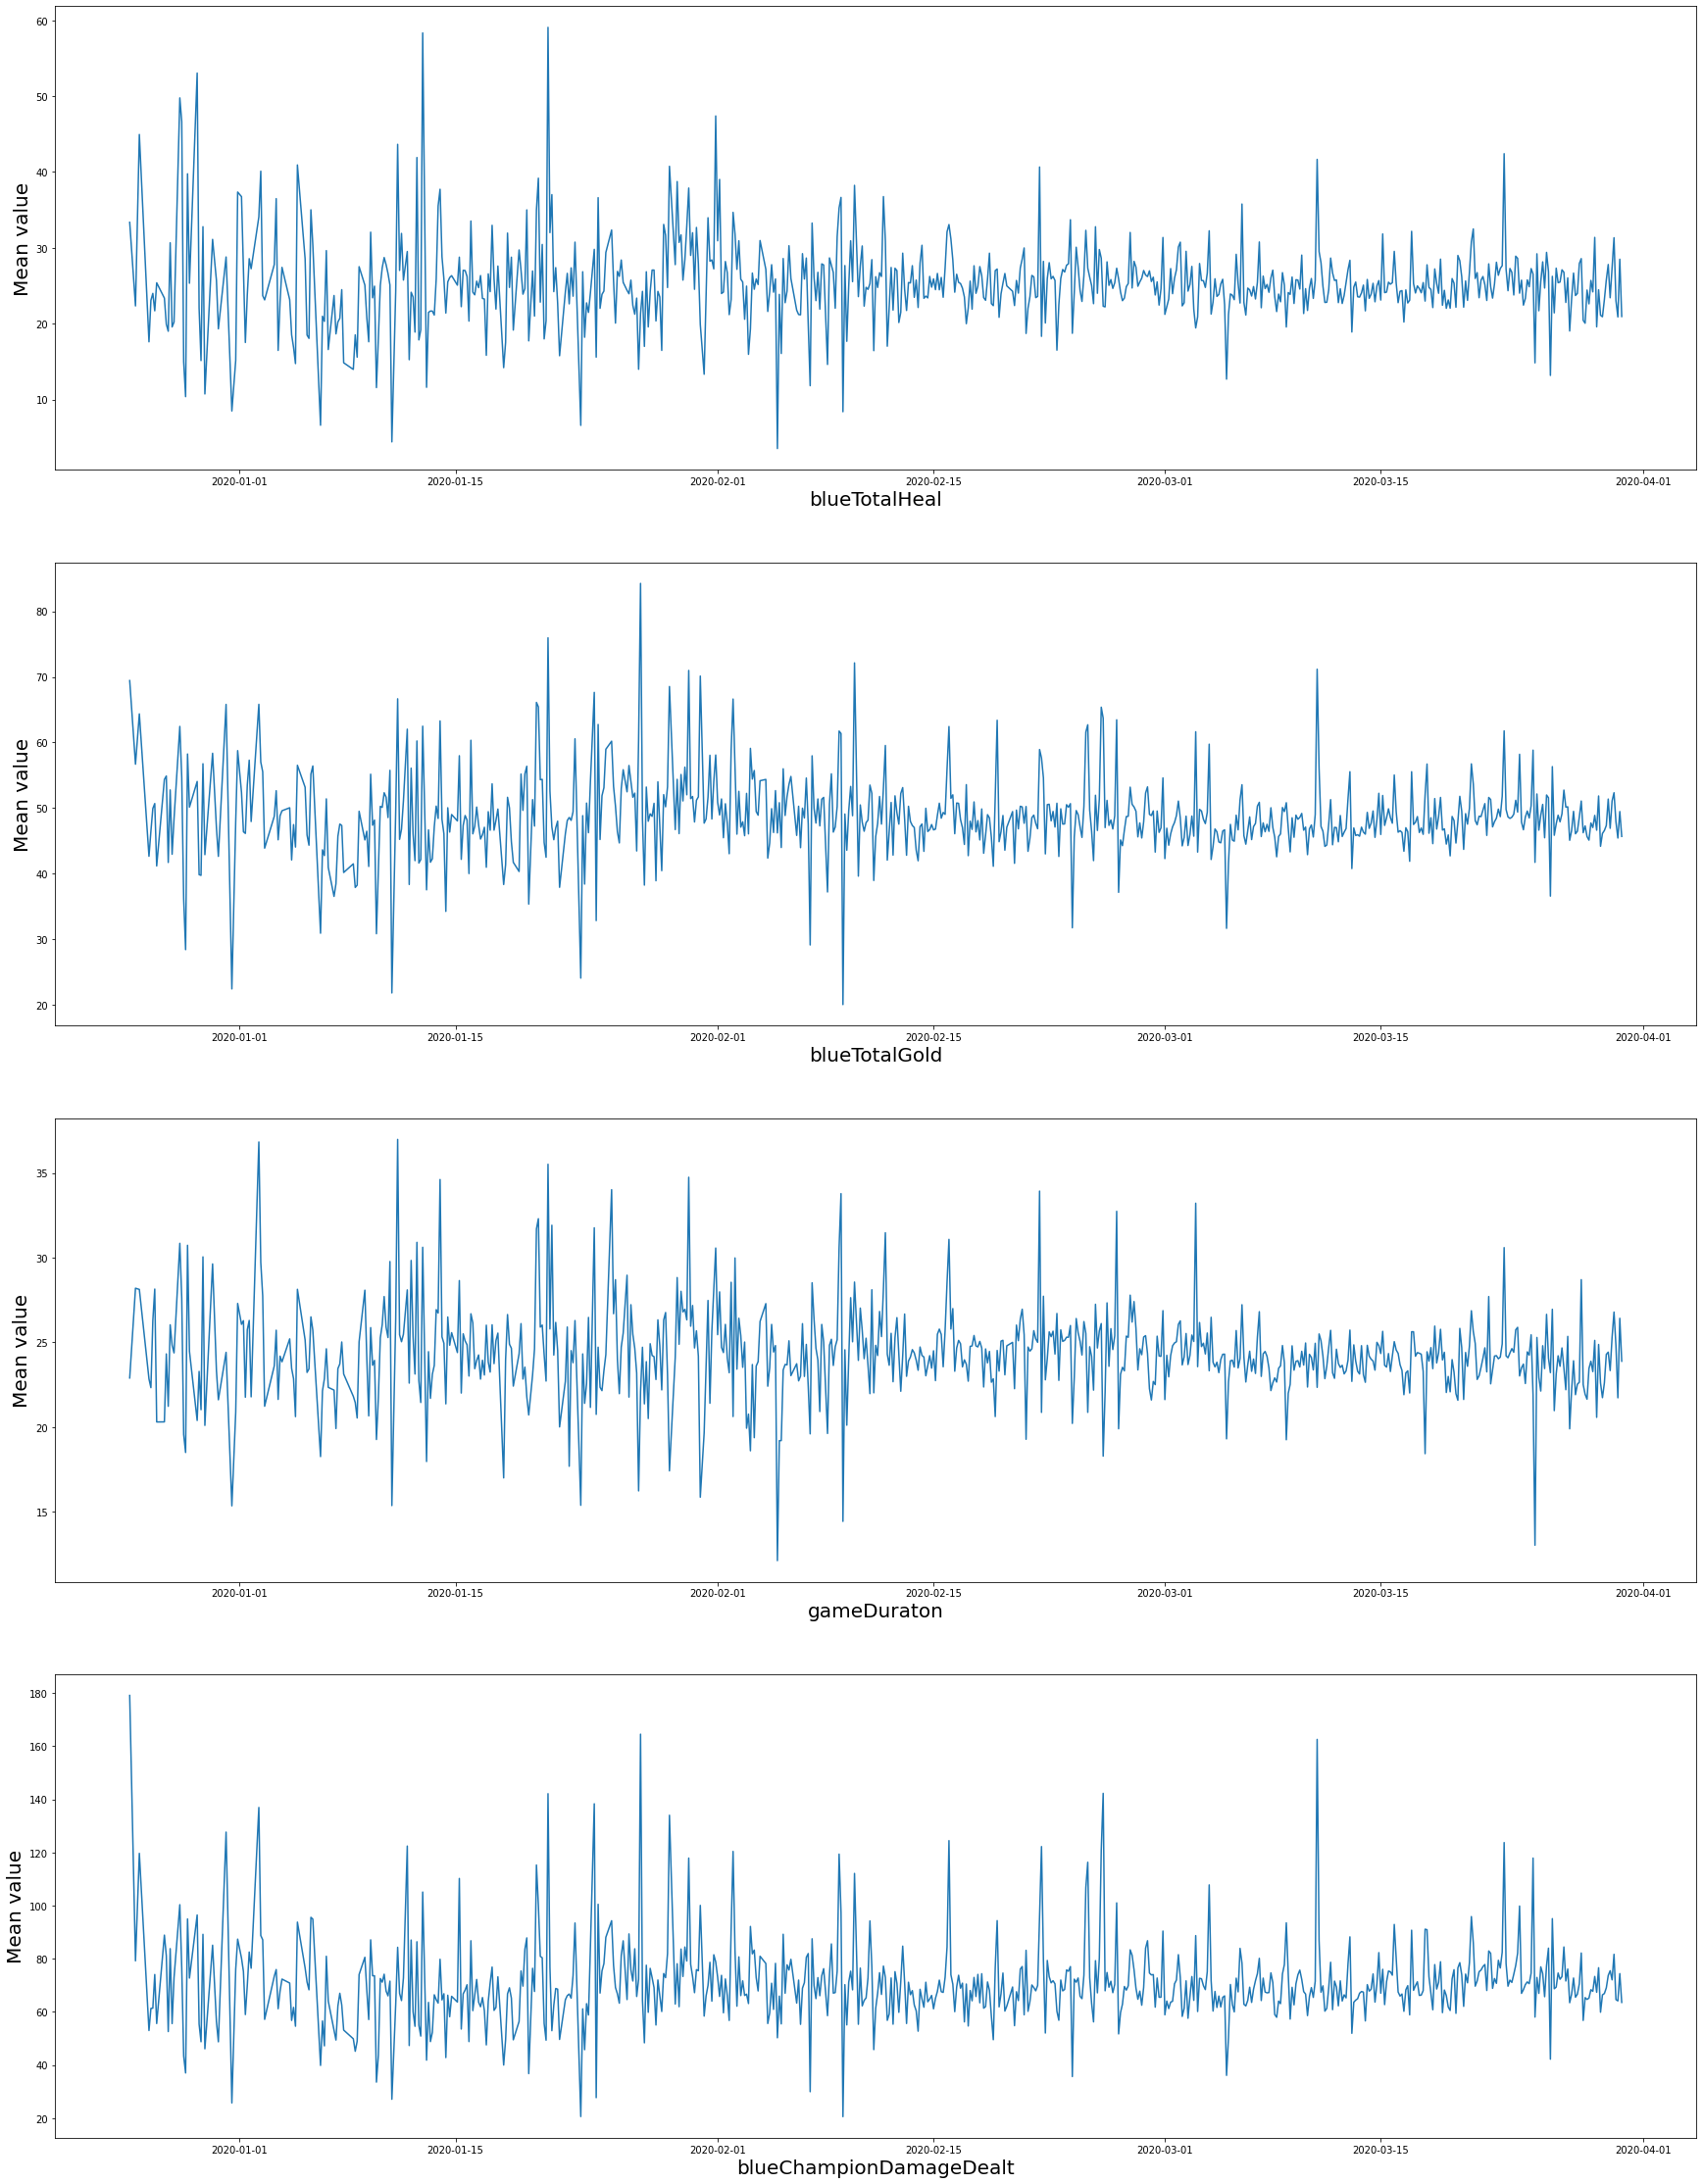

In [111]:
# Make proccess more Stationary
# Remove first sparce part from aggregeted data
drop_part = 300
df_stat = df_agged.drop(df_agged.head(drop_part).index, inplace=False)
print(len(df_stat))
fig, axes = plt.subplots(len(col_names), figsize=(30, 10 * len(col_names)))

idx = 0
for col_name in col_names:
    axes[idx].plot(df_stat['timeStamp'],df_stat[col_name])

    axes[idx].set_xlabel(col_name, fontsize = 20)
    axes[idx].set_ylabel(u'Mean value', fontsize = 20)

    idx += 1

In [126]:
# Test for Stationarity
for col_name in col_names:
    print("------------------------------", col_name, "--------------------------------")
    result = smt.stattools.adfuller(df_stat[col_name], regression="ct")
    print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))
    sign_lvl = 0.05
    if result[1] < sign_lvl:
        print("STATIONARY")
    else:
        print("NON-STATIONARY")
    print("--------------------------------------------------------------------------------")


------------------------------ blueTotalHeal --------------------------------
Augmented Dickey-Fuller test:
Statistic value = -7.840934
p-value = 0.000000
STATIONARY
--------------------------------------------------------------------------------
------------------------------ blueTotalGold --------------------------------
Augmented Dickey-Fuller test:
Statistic value = -6.731542
p-value = 0.000000
STATIONARY
--------------------------------------------------------------------------------
------------------------------ gameDuraton --------------------------------
Augmented Dickey-Fuller test:
Statistic value = -8.429682
p-value = 0.000000
STATIONARY
--------------------------------------------------------------------------------
------------------------------ blueChampionDamageDealt --------------------------------
Augmented Dickey-Fuller test:
Statistic value = -7.442436
p-value = 0.000000
STATIONARY
--------------------------------------------------------------------------------


Exercise №3

Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets.

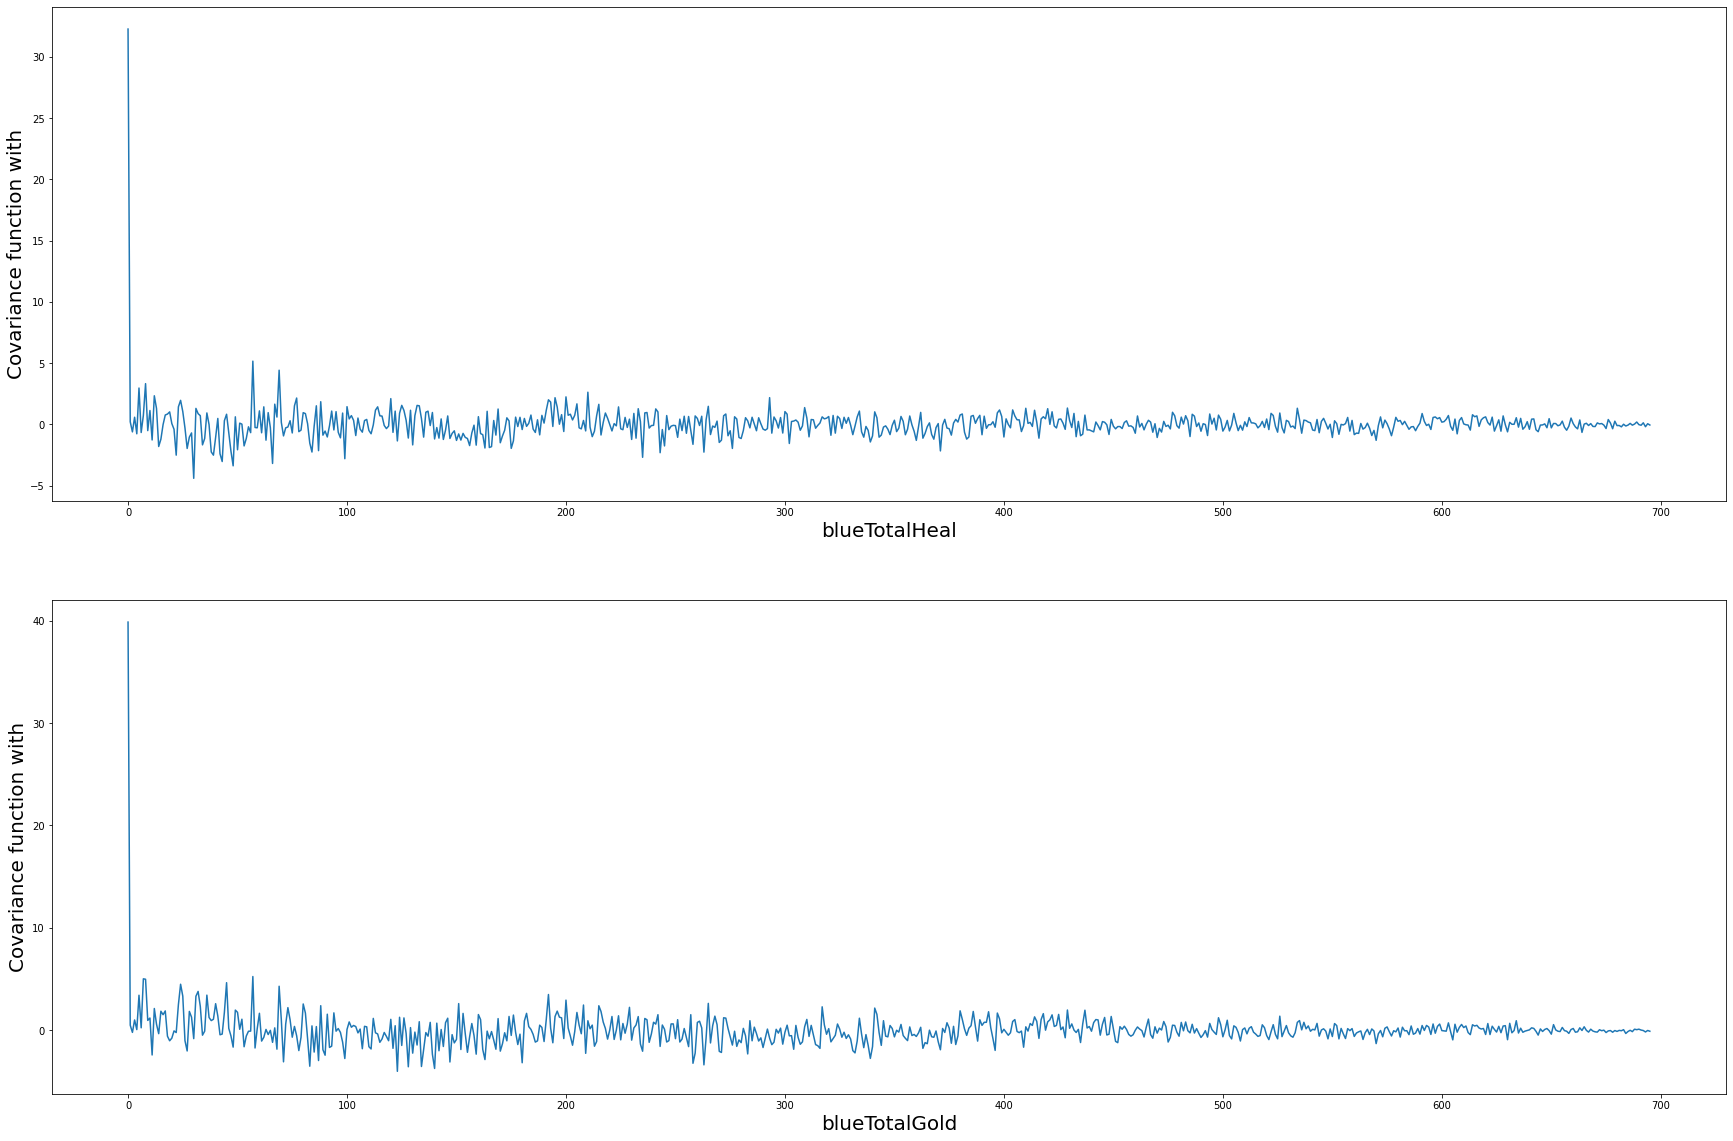

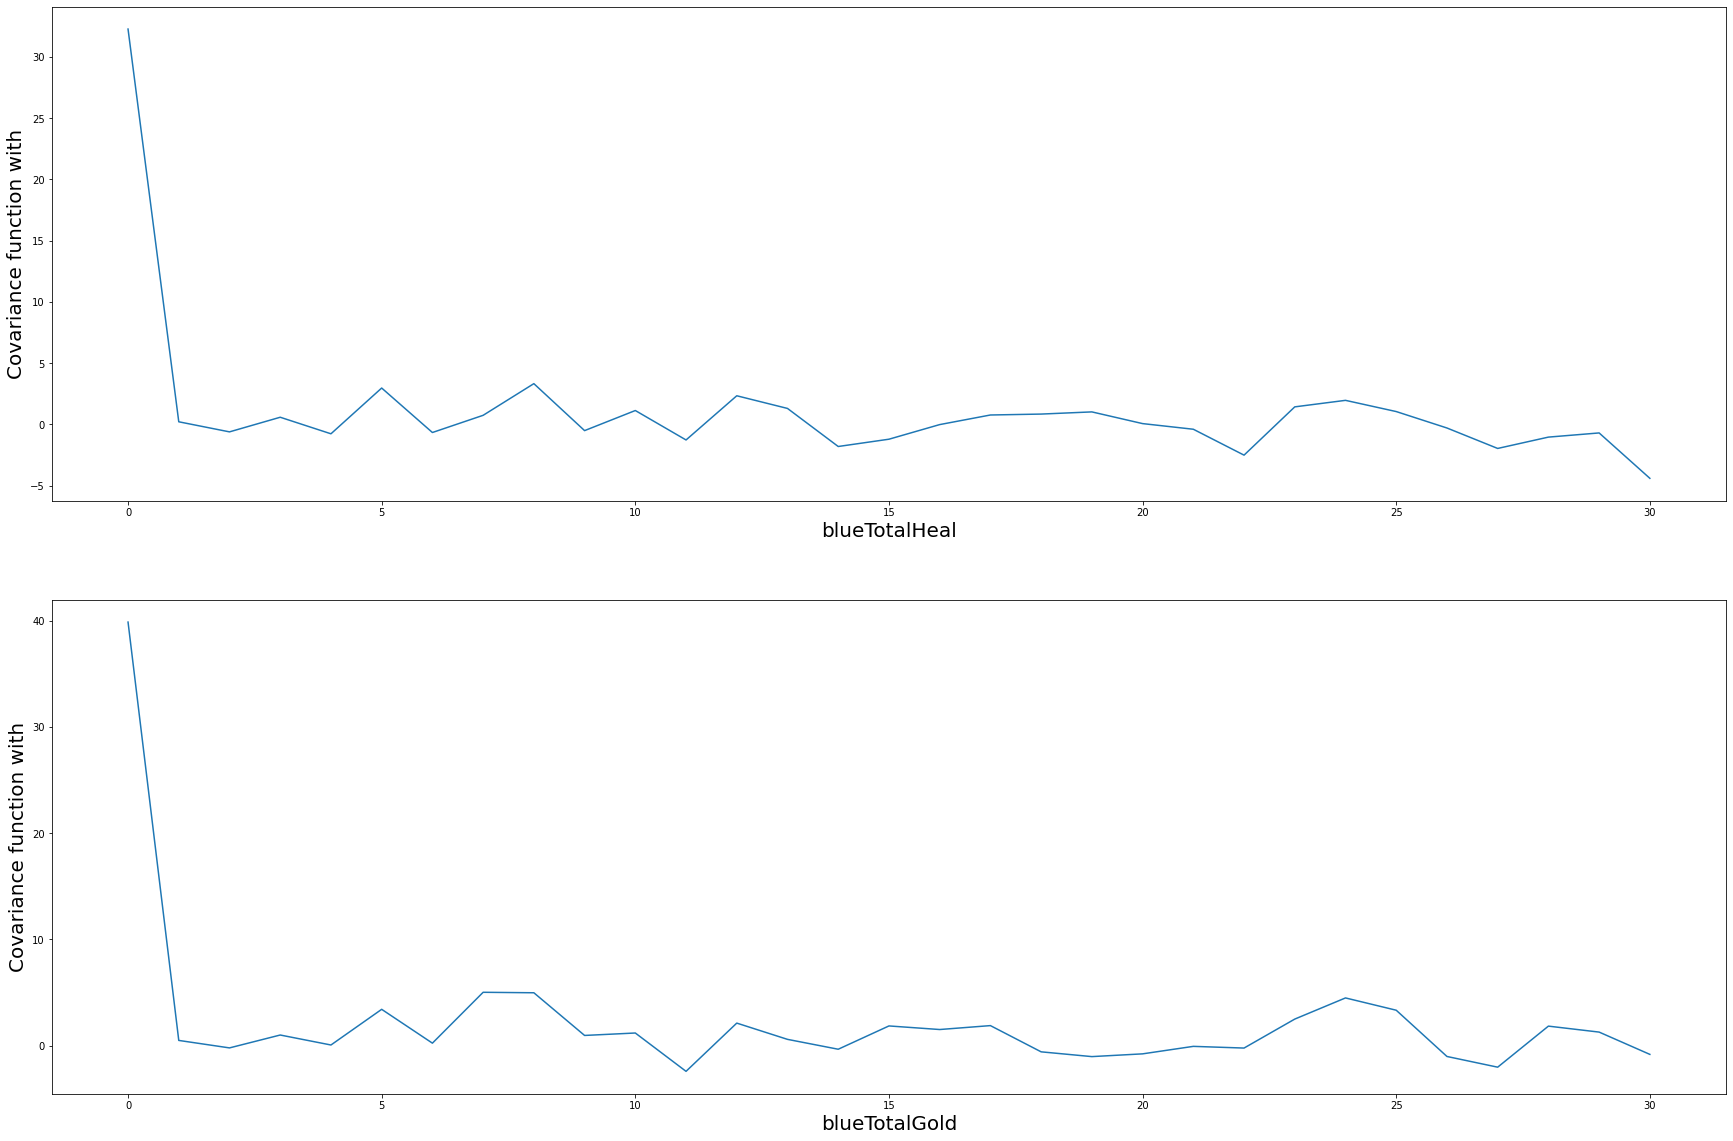

In [137]:
# Analyze auto covariance function (Seems like for stationary processes )

# Autocovariance without window
fig, axes = plt.subplots(len(target_cols), figsize=(30, 10 * len(target_cols)))
idx = 0
for col_name in target_cols:
    axes[idx].plot(stattools.acovf(df_stat[col_name],fft=False)) 
    axes[idx].set_xlabel(col_name, fontsize = 20)
    axes[idx].set_ylabel(u'Covariance function with', fontsize = 20)
    idx += 1
# Autocovariance with window
window_s=30
fig, axes = plt.subplots(len(target_cols), figsize=(30, 10 * len(target_cols)))
idx = 0
for col_name in target_cols:
    axes[idx].plot(stattools.acovf(df_stat[col_name], nlag=window_s, fft=False)) 
    axes[idx].set_xlabel(col_name, fontsize = 20)
    axes[idx].set_ylabel(u'Covariance function with', fontsize = 20)
    idx += 1